In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df=df.iloc[:,2:]

In [5]:
df.sample(5)

,Age,EstimatedSalary,Purchased
87,28,85000,0
34,27,90000,0
12,20,86000,0
213,35,58000,0
152,31,76000,0


# Train test split

In [7]:
X=df.drop('Purchased',axis=1)
y=df['Purchased']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=51)
X_train.shape,X_test.shape

((280, 2), (120, 2))

# StandardScaler

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

sc.fit(X_train)

X_train_scaled=sc.transform(X_train)
X_test_scaled=sc.transform(X_test)

In [12]:
sc.mean_

array([3.75035714e+01, 6.83357143e+04])

In [15]:
X_train.head(4)

,Age,EstimatedSalary
113,37,55000
206,55,130000
198,26,80000
207,52,114000


In [20]:
X_train_scaled

array([[-0.04681023, -0.39200143],
       [ 1.62640663,  1.81261292],
       [-1.06933165,  0.34287002],
       [ 1.34753715,  1.34229519],
       [-0.88341867, -0.71534486],
       [ 1.90527611,  0.96016204],
       [ 1.9982326 ,  0.4310546 ],
       [ 1.81231961, -0.24502714],
       [-1.6270706 , -1.33263688],
       [ 0.88275469, -1.42082146],
       [-1.6270706 ,  0.40165974],
       [ 0.88275469, -0.50958086],
       [-0.23272322, -1.42082146],
       [ 0.23205924,  0.28408031],
       [-0.97637516,  2.01837692],
       [-1.25524464, -1.33263688],
       [-1.16228814,  0.34287002],
       [-0.79046217, -0.62716029],
       [ 0.97571118, -1.15626773],
       [ 0.04614626, -0.09805285],
       [-0.97637516,  0.6368186 ],
       [-0.5115927 ,  1.43047977],
       [ 1.25458066,  1.93019235],
       [-0.4186362 ,  1.31290033],
       [-0.23272322, -1.36203174],
       [-1.06933165,  0.37226488],
       [-0.4186362 ,  2.37111522],
       [ 1.53345014,  1.16592604],
       [-0.5115927 ,

In [22]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [26]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.5,68335.7
std,10.8,34080.5
min,18.0,15000.0
25%,29.0,42000.0
50%,37.0,67000.0
75%,46.0,86000.0
max,60.0,150000.0


In [27]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,-0.0
std,1.0,1.0
min,-1.8,-1.6
25%,-0.8,-0.8
50%,-0.0,-0.0
75%,0.8,0.5
max,2.1,2.4


# Effect of Scaling

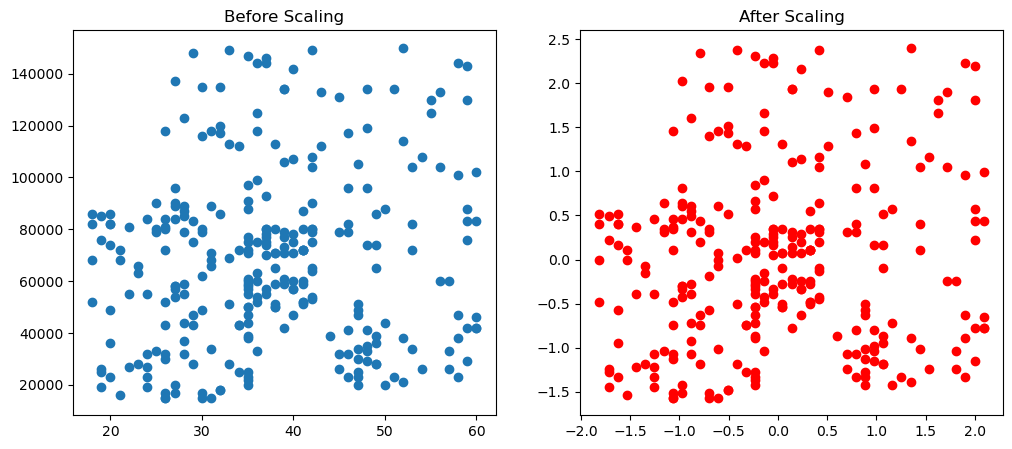

In [34]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

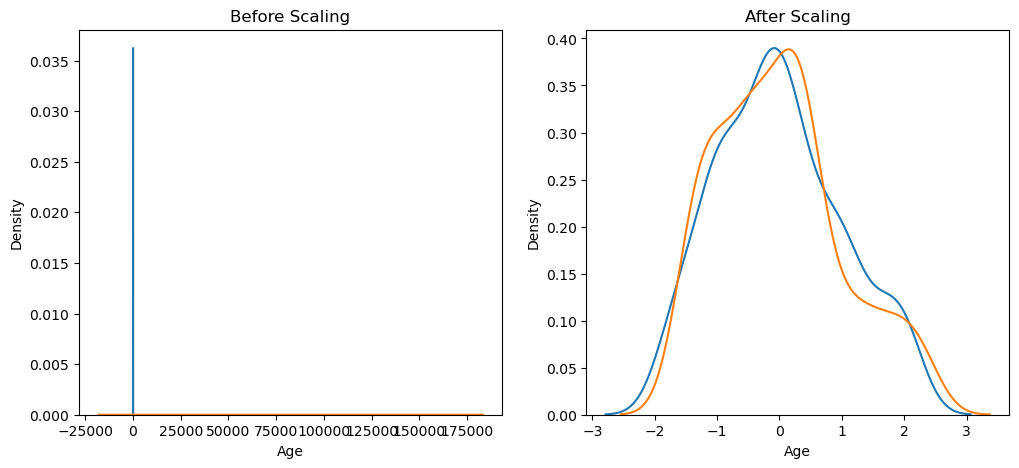

In [38]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)

plt.show()

# Comparison of Distributions

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Age Distribution After Scaling'}, xlabel='Age', ylabel='Density'>

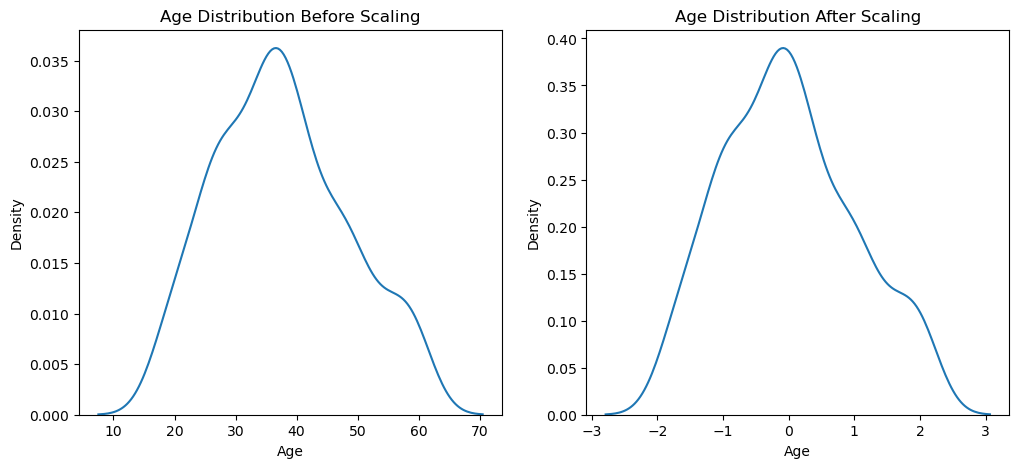

In [41]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Age Distribution Before Scaling")
sns.kdeplot(X_train['Age'],ax=ax1)

ax2.set_title("Age Distribution After Scaling")
sns.kdeplot(X_train_scaled['Age'],ax=ax2)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


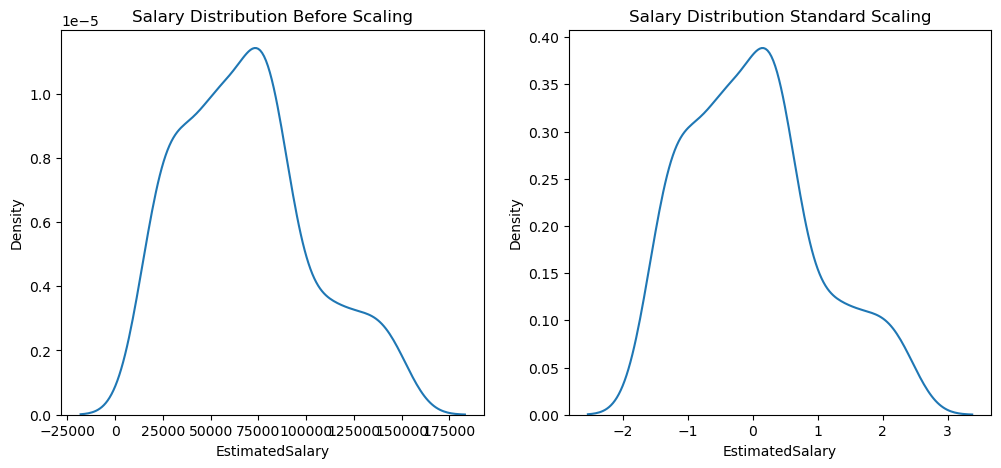

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Importance Of Scaling

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [46]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [47]:
y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.65
Scaled 0.8666666666666667


In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dt=DecisionTreeClassifier()
dt_scaled=DecisionTreeClassifier()

In [52]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [53]:
y_pred=dt.predict(X_test)
y_pred_scaled=dt_scaled.predict(X_test_scaled)

In [54]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.8333333333333334
Scaled 0.8333333333333334


In [55]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# Effect of Outlier

In [57]:
df=df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True))

SyntaxError: unmatched ')' (1205206962.py, line 1)